In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Train.csv')

In [3]:
test=pd.read_csv('Test.csv')

In [4]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
df.isnull().any()

country                   False
year                      False
uniqueid                  False
bank_account              False
location_type             False
cellphone_access          False
household_size            False
age_of_respondent         False
gender_of_respondent      False
relationship_with_head    False
marital_status            False
education_level           False
job_type                  False
dtype: bool

In [6]:
df['job_type'].value_counts()

Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: job_type, dtype: int64

In [7]:
df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


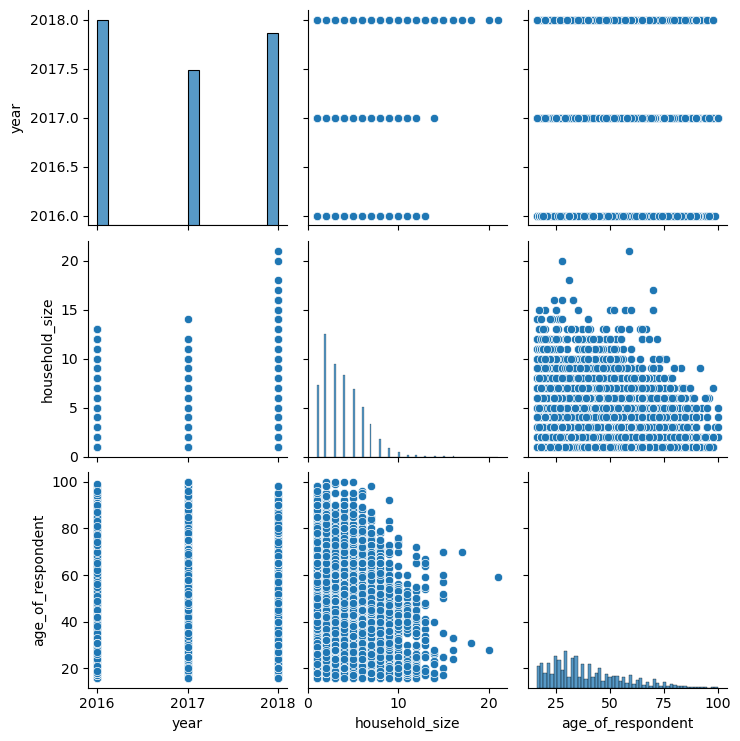

In [8]:
sns.pairplot(data=df)

<AxesSubplot:>

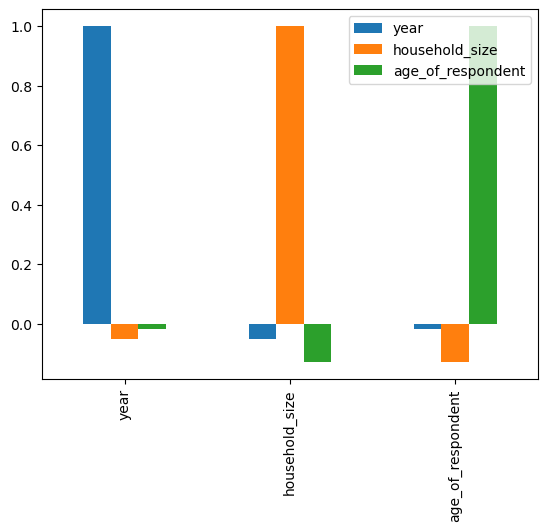

In [9]:
df.corr().plot(kind='bar')

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [12]:
le = LabelEncoder()
df['bank_account'] = le.fit_transform(df['bank_account'])

In [13]:
X = df.drop(['bank_account'], axis=1)
y = df['bank_account']

In [14]:
# function to preprocess our data from train models
def preprocessing_data(data):

    # Convert the following numerical labels from interger to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)
    
    # categorical features to be onverted to One Hot Encoding
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]
    
    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)
    
    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    
    # drop uniquid column
    data = data.drop(["uniqueid"], axis=1)
    
    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    
    return data

In [15]:
processed_train = preprocessing_data(X)

In [16]:
processed_test = preprocessing_data(test)

In [17]:
print(processed_train)

[[1. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 0. 1. ... 0. 0. 1.]
 [1. 1. 1. ... 0. 0. 1.]
 [1. 0. 1. ... 0. 0. 1.]]


In [18]:
# Split train_data
from sklearn.model_selection import train_test_split

In [19]:
X_Train, X_Val, y_Train, y_val = train_test_split(processed_train, y, stratify = y,test_size = 0.1, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()

In [21]:
print(X_Train)

[[1.  0.  0.  ... 0.  0.  1. ]
 [0.5 1.  0.  ... 0.  1.  0. ]
 [1.  0.  1.  ... 0.  0.  0. ]
 ...
 [0.5 1.  0.  ... 0.  1.  0. ]
 [0.  1.  1.  ... 1.  0.  0. ]
 [0.  0.  0.  ... 1.  0.  0. ]]


In [22]:
LR.fit(X_Train,y_Train)

C:\Users\janem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
predictions=LR.predict(X_Val)

C:\Users\janem\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


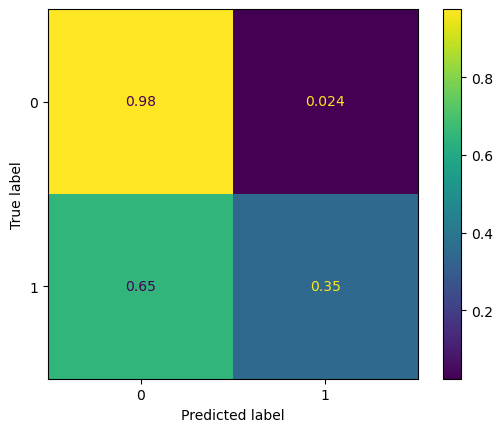

In [24]:
#evaluation
from sklearn.metrics import plot_confusion_matrix

# Get confusion matrix for Gradient Boosting Classifier
plot_confusion_matrix(LR,X_Val, y_val,normalize='true')

In [25]:
#interpretation
#the model predicts more 0 than 1,the data is imbalanced

In [26]:
#solution
from sklearn.model_selection import GridSearchCV

In [36]:
param_grid={'C': [1.0],
 'class_weight': [None],
 'dual':[ False],
 'fit_intercept': [True],
 'intercept_scaling': [1],
 'l1_ratio': [None],
 'max_iter':[100],
 'multi_class':[ 'auto'],
 'n_jobs': [None],
 'penalty': ['l2'],
 'random_state': [None],
 'solver': ['lbfgs'],
 'tol':[ 0.0001],
 'verbose':[ 3],
 'warm_start': [False]}

In [37]:
grid=GridSearchCV(LR,param_grid,verbose=3,n_jobs=-1,cv=5)

In [38]:
grid.fit(X_Train,y_Train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\janem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1.0], 'class_weight': [None], 'dual': [False],
                         'fit_intercept': [True], 'intercept_scaling': [1],
                         'l1_ratio': [None], 'max_iter': [100],
                         'multi_class': ['auto'], 'n_jobs': [None],
                         'penalty': ['l2'], 'random_state': [None],
                         'solver': ['lbfgs'], 'tol': [0.0001], 'verbose': [3],
                         'warm_start': [False]},
             verbose=3)

In [31]:
LR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [39]:
grid.best_params_

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 3,
 'warm_start': False}

In [45]:
LR2= LogisticRegression(C= 1.0,
 class_weight= None,
 dual= False,
 fit_intercept= True,
 intercept_scaling= 1,
 l1_ratio= None,
 max_iter= 100,
 multi_class= 'auto',
 n_jobs= None,
 penalty= 'l2',
 random_state= None,
 solver= 'lbfgs',
 tol= 0.0001,
 verbose= 3,
 warm_start= False)

In [46]:
LR2.fit(X_Train, y_Train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\janem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s finished


LogisticRegression(verbose=3)

In [47]:
new_pred=LR2.predict(X_Val)

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("logisticregression error: ", 1 - accuracy_score(y_val, new_pred))

logisticregression error:  0.11219719507012327


C:\Users\janem\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


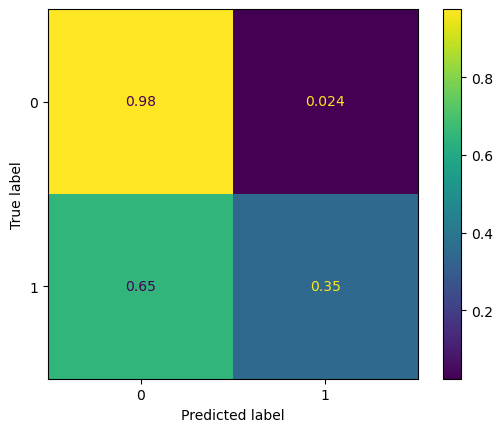

In [50]:
plot_confusion_matrix(LR2,X_Val, y_val,normalize='true')

In [51]:
grid_pred=grid.predict(X_Val)

C:\Users\janem\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


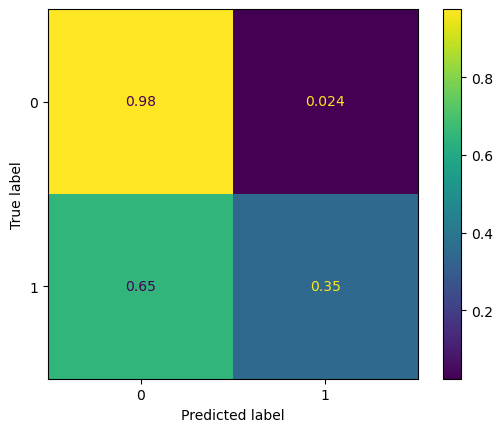

In [52]:
plot_confusion_matrix(grid,X_Val, y_val,normalize='true')

In [54]:
LR2.predict(processed_test)

array([1, 1, 0, ..., 0, 0, 0])

In [55]:
pred=LR2.predict(processed_test)

In [56]:
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],
                           "bank_account": pred})

In [57]:
submission['bank_account'].value_counts()

0    9373
1     713
Name: bank_account, dtype: int64

In [58]:
#creating a csv file of the predictions
submission.to_csv('first_submission.csv', index = False)